# **Project_1(Heart.csv)**

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## EDA & Cleaning



In [49]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [51]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [52]:
df.duplicated().sum()

np.int64(0)

<Axes: ylabel='Frequency'>

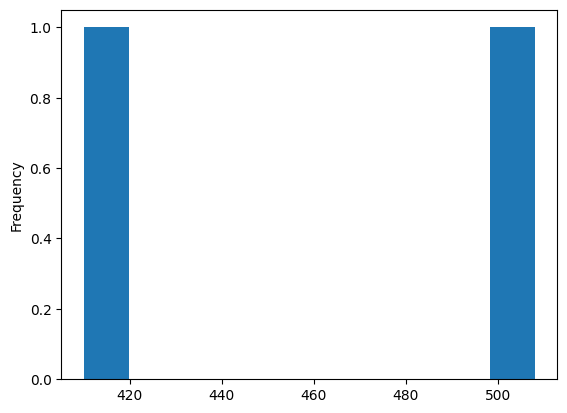

In [53]:
df['HeartDisease'].value_counts().plot(kind='hist')

In [54]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

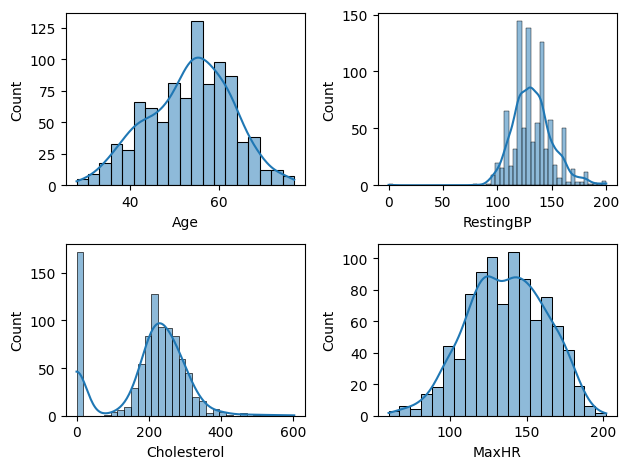

In [55]:
def plotting (var,num):
  plt.subplot(2,2,num)
  sns.histplot(df[var],kde = True)
plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)
plt.tight_layout()

In [56]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [57]:
ch_mean = df.loc[df['Cholesterol'] != 0,'Cholesterol'].mean()
ch_mean

np.float64(244.6353887399464)

In [58]:
df['Cholesterol'] = df['Cholesterol'].replace(0,ch_mean)
df['Cholesterol']=df['Cholesterol'].round(2)

In [59]:
resting_bp_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()
df['RestingBP'] = df['RestingBP'].replace(0, resting_bp_mean)
df['RestingBP'] = df['RestingBP'].round(2)

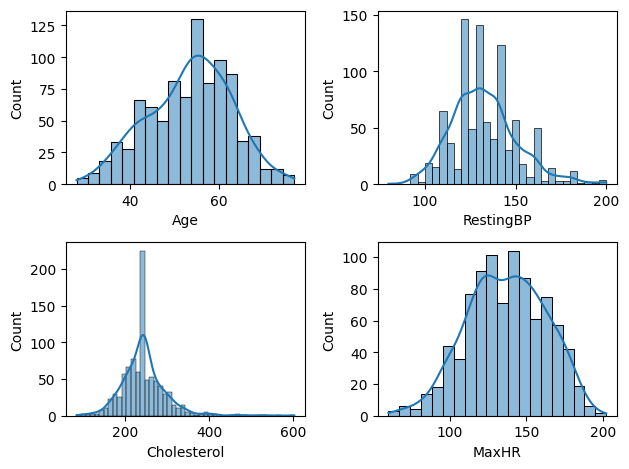

In [60]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde = True)
plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)
plt.tight_layout()

In [61]:
pip install sheryanalysis==0.1.0

Note: you may need to restart the kernel to use updated packages.


In [62]:
import sheryanalysis as sh
sh.analyze(df)


🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (918, 12)
🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

✅ No null values found

🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


{'shape': (918, 12),
 'columns': ['Age',
  'Sex',
  'ChestPainType',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'RestingECG',
  'MaxHR',
  'ExerciseAngina',
  'Oldpeak',
  'ST_Slope',
  'HeartDisease'],
 'dtypes': {'Age': dtype('int64'),
  'Sex': dtype('O'),
  'ChestPainType': dtype('O'),
  'RestingBP': dtype('float64'),
  'Cholesterol': dtype('float64'),
  'FastingBS': dtype('int64'),
  'RestingECG': dtype('O'),
  'MaxHR': dtype('int64'),
  'ExerciseAngina': dtype('O'),
  'Oldpeak': dtype('float64'),
  'ST_Slope': dtype('O'),
  'HeartDisease': dtype('int64')},
 'null_counts': {'Age': 0,
  'Sex': 0,
  'ChestPainType': 0,
  'RestingBP': 0,
  'Cholesterol': 0,
  'FastingBS': 0,
  'RestingECG': 0,
  'MaxHR': 0,
  'ExerciseAngina': 0,
  'Oldpeak': 0,
  'ST_Slope': 0,
  'HeartDisease': 0},
 'total_rows': 918,
 'column_types': {'categorical': ['Sex',
   'ChestPainType',
   'FastingBS',
   'RestingECG',
   'ExerciseAngina',
   'ST_Slope',
   'HeartDisease'],
  'numerical': ['Age', 'Rest

<Axes: xlabel='Sex', ylabel='count'>

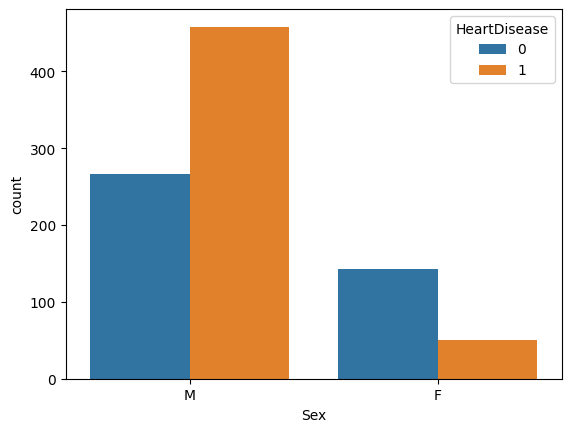

In [63]:
sns.countplot(x = df['Sex'],hue = df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

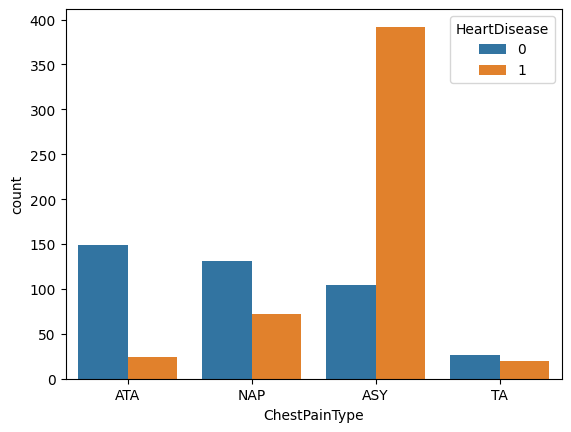

In [64]:
sns.countplot(x = df['ChestPainType'],hue = df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

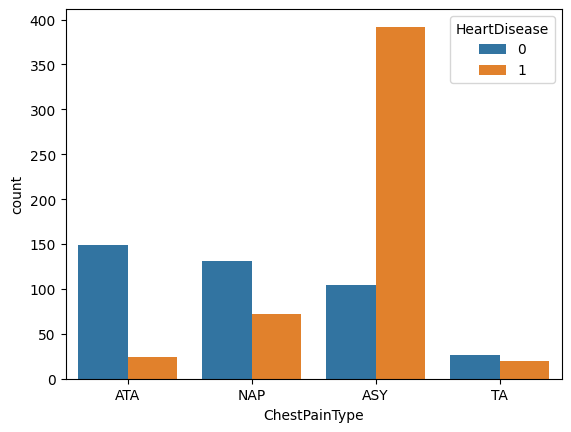

In [65]:
sns.countplot(x = df['ChestPainType'],hue = df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

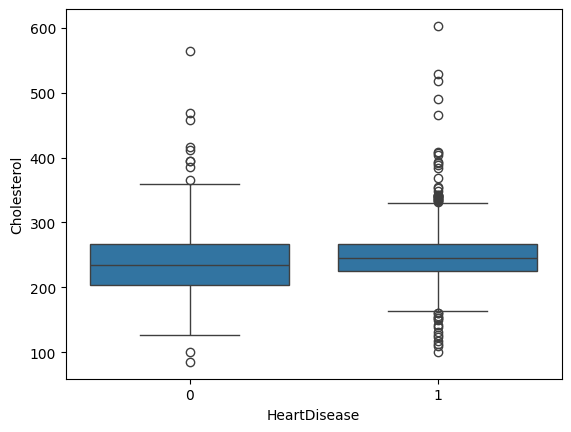

In [66]:
sns.boxplot(x = 'HeartDisease', y = 'Cholesterol',data = df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

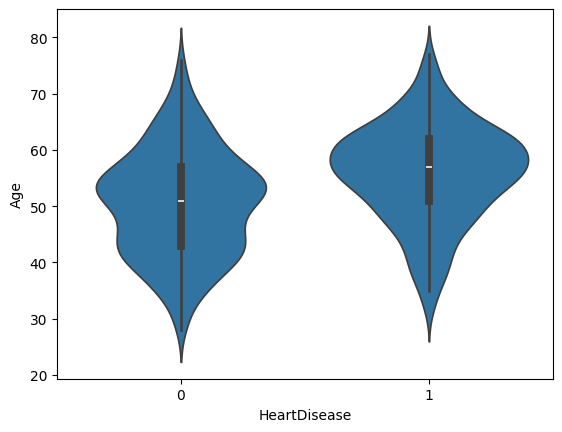

In [67]:
sns.violinplot(x='HeartDisease', y='Age', data=df)

<Axes: >

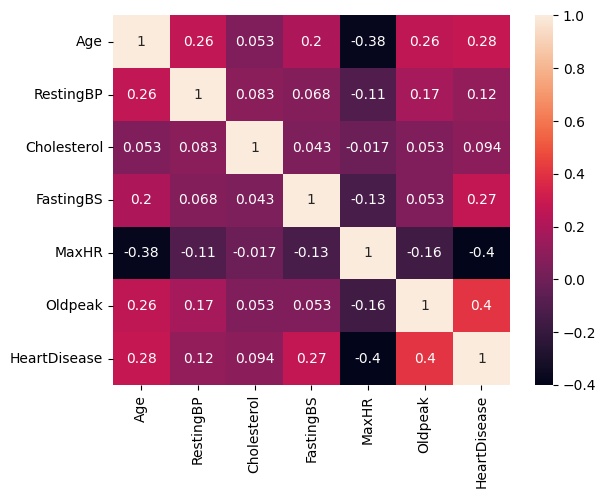

In [68]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Data preprocessing and cleaning

In [69]:
df_encode = pd.get_dummies(df,drop_first=True)
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [70]:
df_encode = df_encode.astype(int)
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [71]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df_encode[numerical_cols] = scaler.fit_transform(df_encode[numerical_cols])
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1


# **Project_2(Insurance.csv)**

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [73]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## **EDA**

In [74]:
df.shape

(1338, 7)

In [75]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [77]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [78]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [79]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

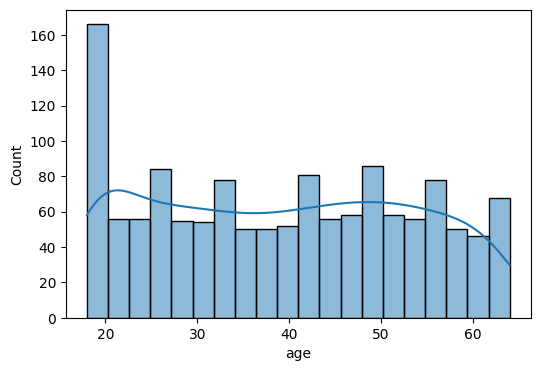

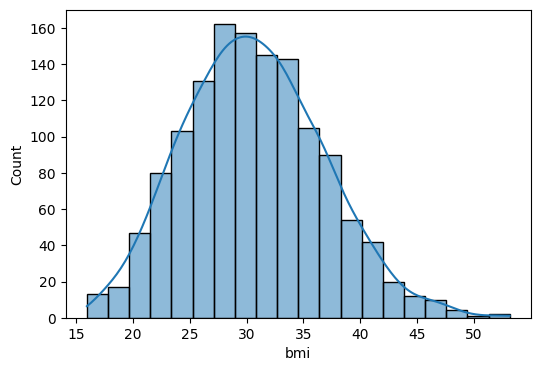

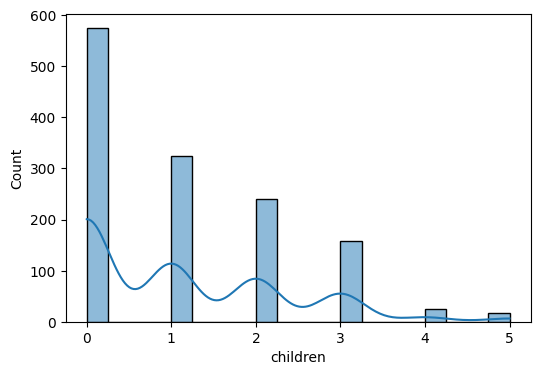

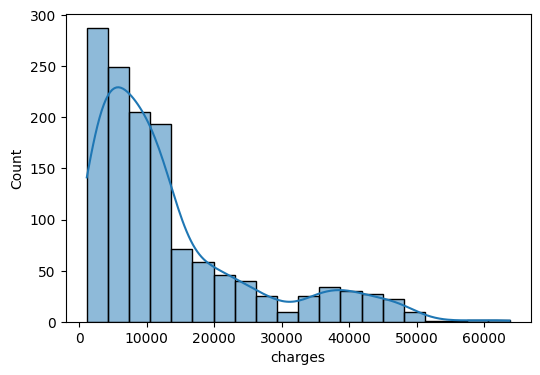

In [80]:
numeric_columns = ['age', 'bmi', 'children','charges']
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde = True,bins = 20)

<Axes: xlabel='children', ylabel='count'>

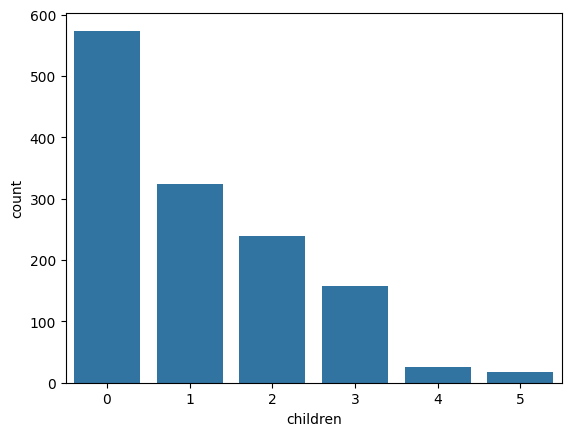

In [81]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

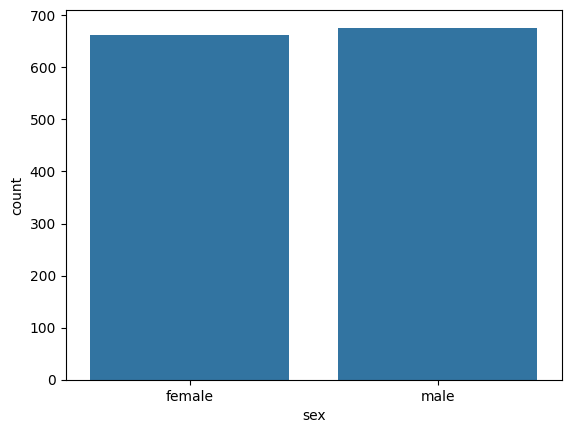

In [82]:
sns.countplot(x = df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

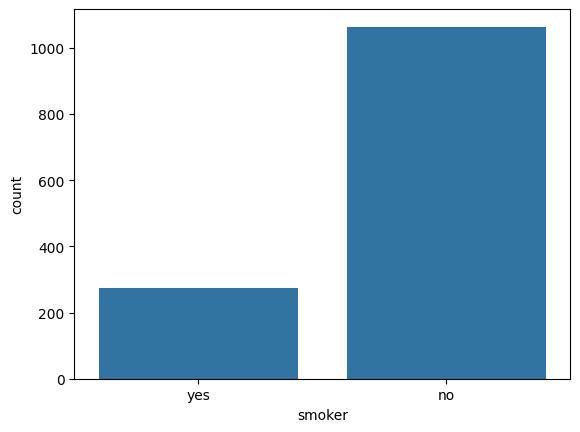

In [83]:
sns.countplot(x = df['smoker'])

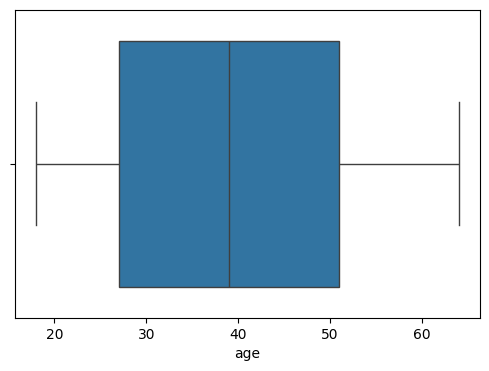

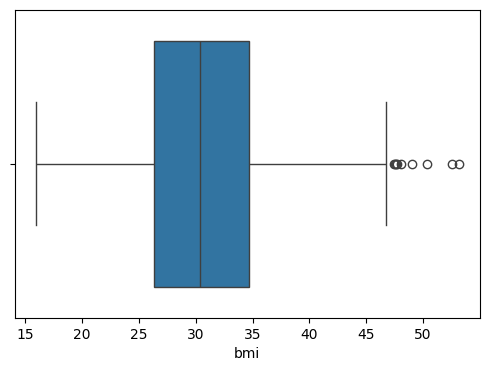

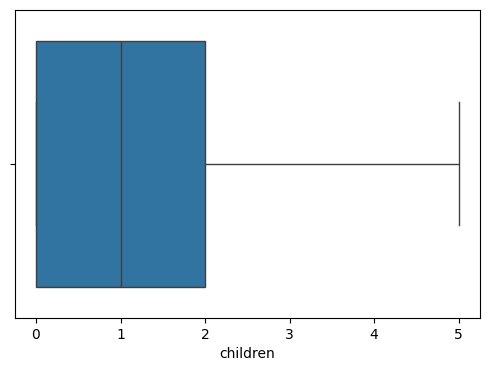

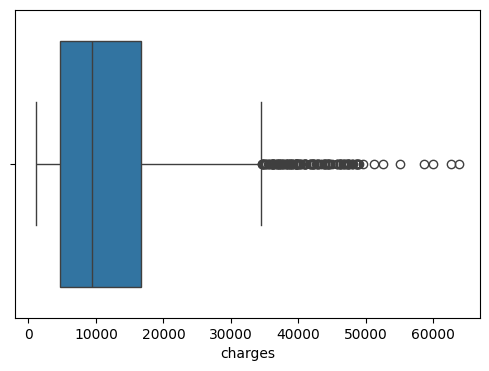

In [84]:
for col in numeric_columns:
    plt.figure(figsize= (6,4))
    sns.boxplot(x = df[col])

<Axes: >

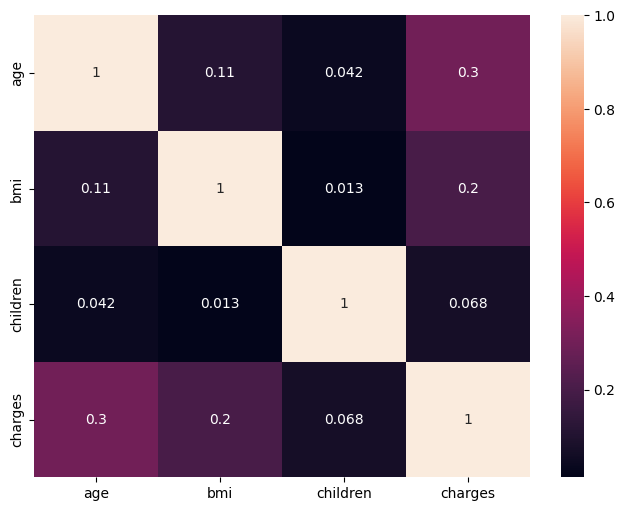

In [85]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

## Data Cleaning and Preprocessing

In [86]:
df_cleaned=df.copy()

In [87]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [88]:
df_cleaned.shape

(1338, 7)

In [89]:
df_cleaned.drop_duplicates(inplace = True)
df_cleaned.shape

(1337, 7)

In [90]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [91]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [92]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [93]:
df_cleaned['sex']=df_cleaned['sex'].map({"male":0,"female":1})
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [94]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [95]:
df_cleaned['smoker']=df_cleaned['smoker'].map({"no":0,"yes":1})
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [96]:
df_cleaned.rename(columns={
    'sex' :'is_female',
    'smoker': 'is_smoker'},inplace = True)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [97]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [98]:
df_cleaned = pd.get_dummies(df_cleaned,columns = ['region'],drop_first=True)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [99]:
df_cleaned = df_cleaned.astype(int)
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


## Featured Engg & Extraction

<Axes: xlabel='bmi', ylabel='Count'>

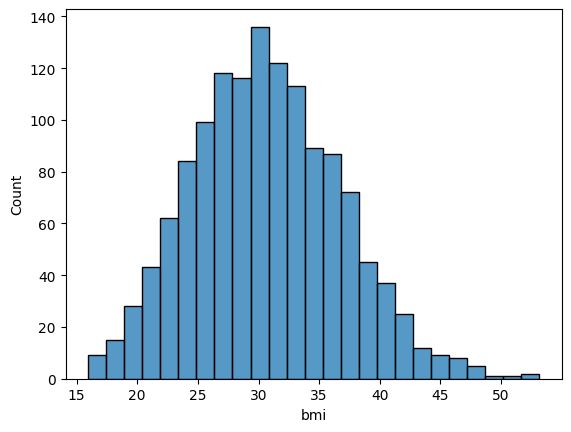

In [100]:
sns.histplot(df['bmi'])

In [101]:
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

In [102]:
df_cleaned = pd.get_dummies(df_cleaned,columns = ['bmi_category'],drop_first=True)

In [103]:
df_cleaned=df_cleaned.astype(int)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0


In [104]:
from sklearn.preprocessing import StandardScaler
cols = ['age','bmi','children']
scaler = StandardScaler()
df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [105]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


In [106]:
from scipy.stats import pearsonr
selected_features = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]
correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_Obese,0.200348
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058046
8,bmi_category_Normal,-0.104042


In [107]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

In [108]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_Obese,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [109]:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges','region_southeast','bmi_category_Obese']]
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0


In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X = final_df.drop('charges', axis=1)
y = final_df['charges']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [115]:
y_pred = model.predict(X_test)

In [116]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1- r2) * (n-1) / (n - p - 1))
adjusted_r2

0.7987962362937233

# **Project_3(Ford.csv)**

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [118]:
df=pd.read_csv('ford.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [119]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [120]:
df.shape

(17966, 9)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [122]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [123]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

## EDA

<Axes: xlabel='price', ylabel='Count'>

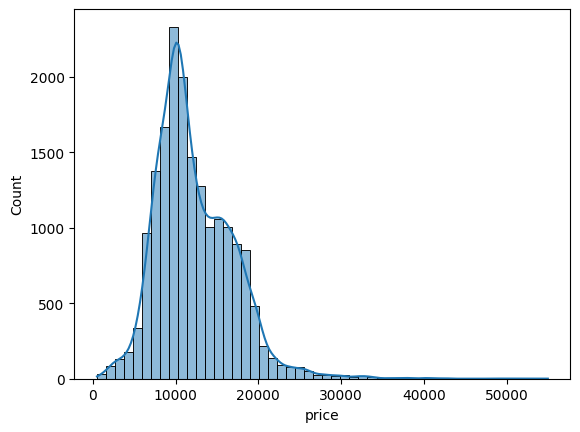

In [124]:
sns.histplot(df['price'],bins=50,kde=True)

<Axes: >

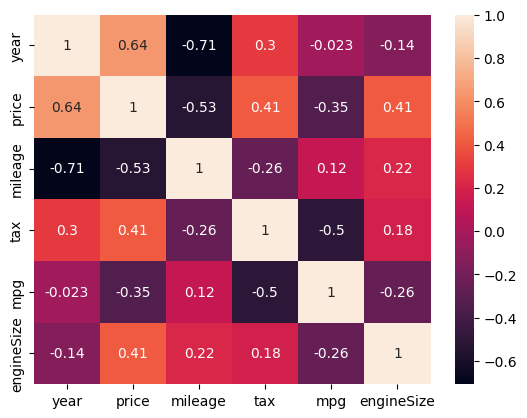

In [125]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, '1996'),
  Text(1, 0, '1998'),
  Text(2, 0, '2000'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018'),
  Text(20, 0, '2019'),
  Text(21, 0, '2020'),
  Text(22, 0, '2060')])

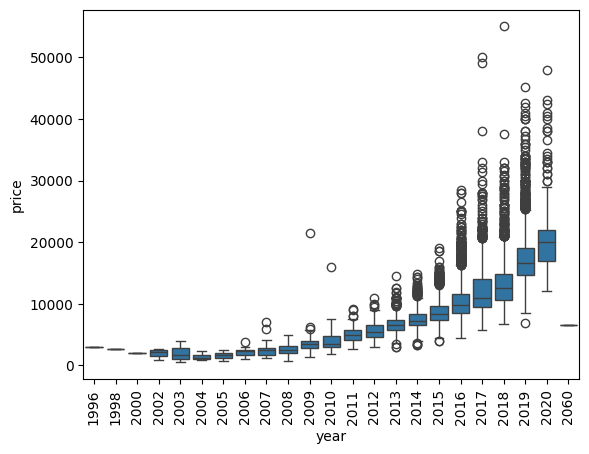

In [126]:
sns.boxplot(data = df, x = 'year', y = 'price')
plt.xticks(rotation = 90)

<Axes: xlabel='mileage', ylabel='price'>

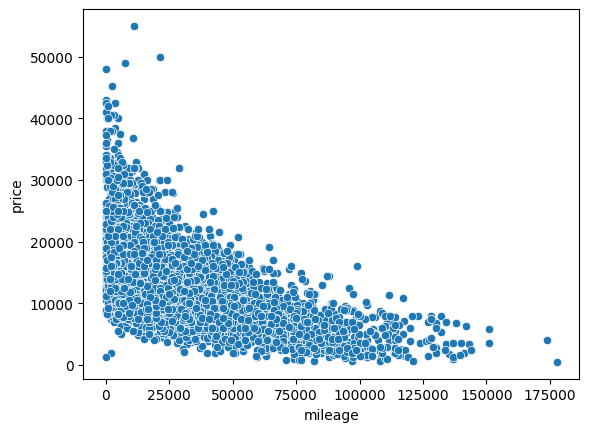

In [127]:
sns.scatterplot(data = df, x = 'mileage',y = 'price')

<Axes: xlabel='engineSize', ylabel='price'>

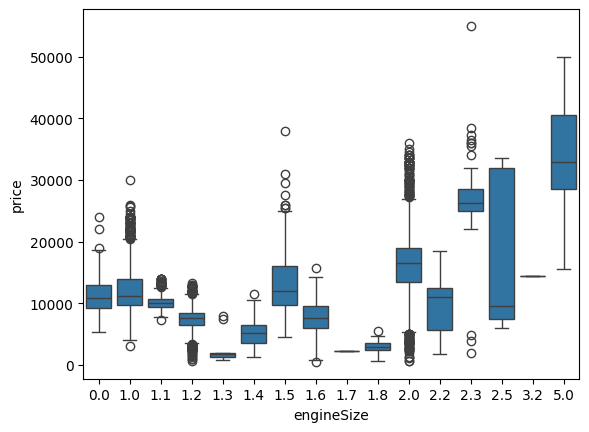

In [128]:
sns.boxplot(data = df, x = 'engineSize', y = 'price')

<Axes: xlabel='transmission', ylabel='price'>

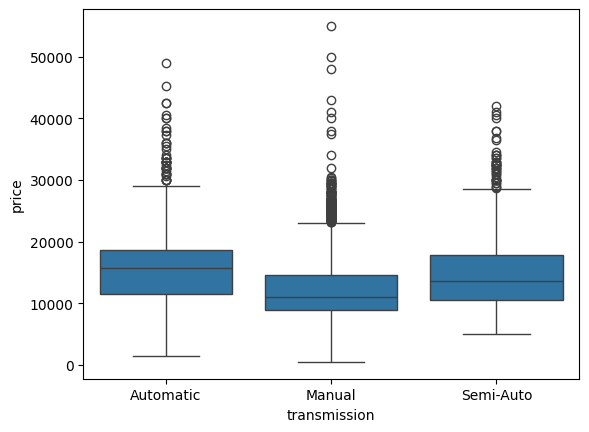

In [129]:
sns.boxplot(data = df, x = 'transmission',y = 'price')

<Axes: xlabel='fuelType', ylabel='price'>

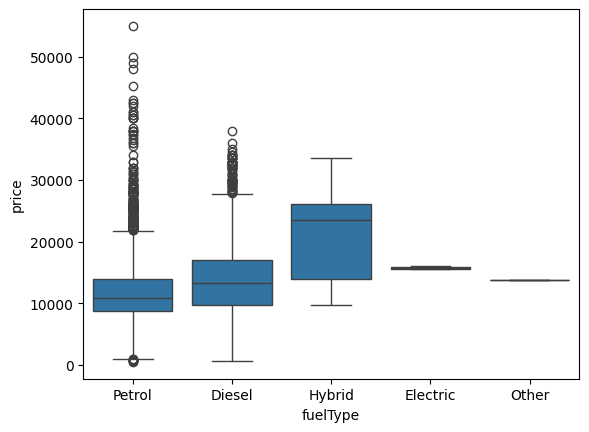

In [130]:
sns.boxplot(data = df,x = 'fuelType', y = 'price' )

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ' Fiesta'),
  Text(1, 0, ' Focus'),
  Text(2, 0, ' Puma'),
  Text(3, 0, ' Kuga'),
  Text(4, 0, ' EcoSport'),
  Text(5, 0, ' C-MAX'),
  Text(6, 0, ' Mondeo'),
  Text(7, 0, ' Ka+'),
  Text(8, 0, ' Tourneo Custom'),
  Text(9, 0, ' S-MAX'),
  Text(10, 0, ' B-MAX'),
  Text(11, 0, ' Edge'),
  Text(12, 0, ' Tourneo Connect'),
  Text(13, 0, ' Grand C-MAX'),
  Text(14, 0, ' KA'),
  Text(15, 0, ' Galaxy'),
  Text(16, 0, ' Mustang'),
  Text(17, 0, ' Grand Tourneo Connect'),
  Text(18, 0, ' Fusion'),
  Text(19, 0, ' Ranger'),
  Text(20, 0, ' Streetka'),
  Text(21, 0, ' Escort'),
  Text(22, 0, ' Transit Tourneo'),
  Text(23, 0, 'Focus')])

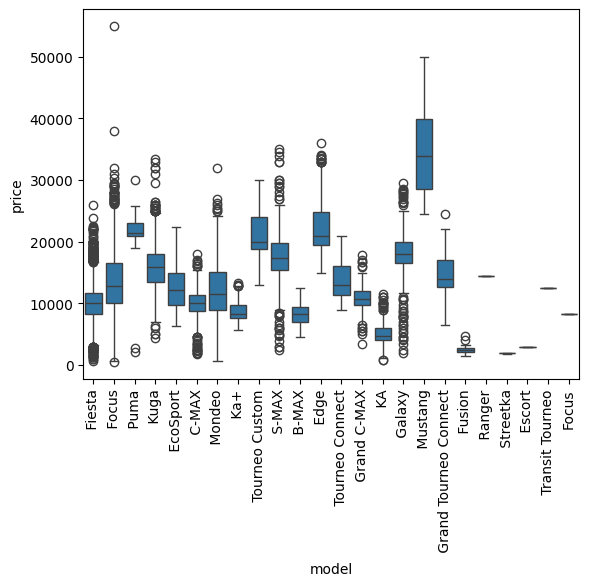

In [131]:
sns.boxplot(x = df['model'],y = df['price'])
plt.xticks(rotation = 90) #to see xlabel

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, '0'),
  Text(1, 0, '20'),
  Text(2, 0, '22'),
  Text(3, 0, '30'),
  Text(4, 0, '110'),
  Text(5, 0, '115'),
  Text(6, 0, '120'),
  Text(7, 0, '125'),
  Text(8, 0, '135'),
  Text(9, 0, '140'),
  Text(10, 0, '145'),
  Text(11, 0, '150'),
  Text(12, 0, '155'),
  Text(13, 0, '160'),
  Text(14, 0, '165'),
  Text(15, 0, '185'),
  Text(16, 0, '190'),
  Text(17, 0, '195'),
  Text(18, 0, '200'),
  Text(19, 0, '205'),
  Text(20, 0, '210'),
  Text(21, 0, '220'),
  Text(22, 0, '230'),
  Text(23, 0, '235'),
  Text(24, 0, '240'),
  Text(25, 0, '260'),
  Text(26, 0, '265'),
  Text(27, 0, '270'),
  Text(28, 0, '290'),
  Text(29, 0, '300'),
  Text(30, 0, '305'),
  Text(31, 0, '325'),
  Text(32, 0, '330'),
  Text(33, 0, '555'),
  Text(34, 0, '570'),
  Text(35, 0, '580')])

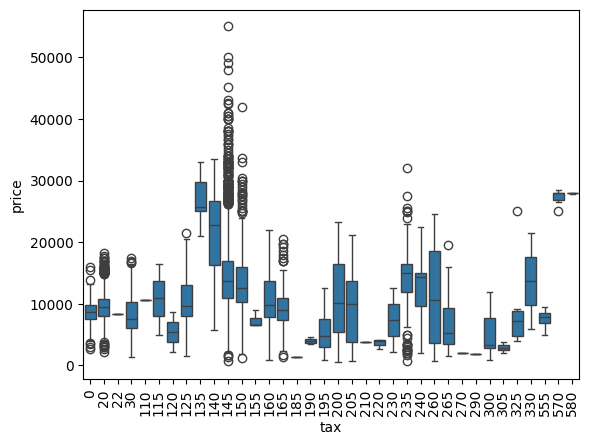

In [132]:
sns.boxplot(x = df['tax'],y = df['price'])
plt.xticks(rotation=90)

<Axes: xlabel='mpg', ylabel='price'>

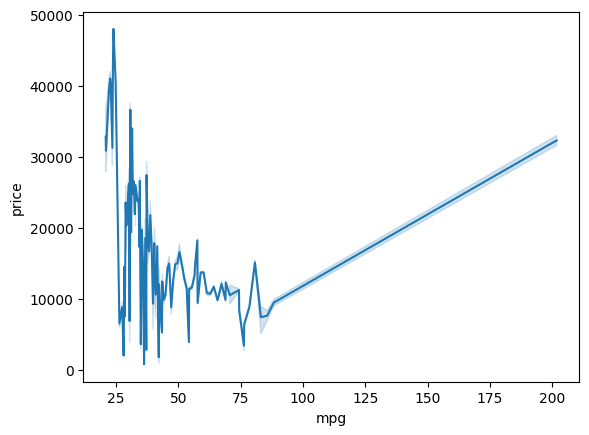

In [133]:
sns.lineplot(x = df['mpg'],y = df['price'])

In [134]:
X = df.drop(columns = ['price'],axis = 1)
y = df['price']

In [135]:
X_one_encode = pd.get_dummies(X,columns = ['model','transmission','fuelType'],drop_first = True)
X_one_encode = X_one_encode.astype(int)
X_one_encode

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,9083,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,12456,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,10460,145,40,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,2019,1482,145,48,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,2014,40700,30,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,2015,7010,20,67,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,2018,5007,145,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [136]:
from sklearn.preprocessing import LabelEncoder
columns = ['model', 'transmission', 'fuelType']
Xlabel = X.copy()  # make a safe copy
label_encoders = {}
for col in columns:
    le = LabelEncoder()
    Xlabel[col] = le.fit_transform(Xlabel[col].astype(str))  # Convert to string in case of nulls
    label_encoders[col] = le

In [137]:
Xlabel

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,0,2017,1,16700,4,150,47.1,1.4
17962,0,2014,1,40700,4,30,57.7,1.0
17963,6,2015,1,7010,0,20,67.3,1.6
17964,11,2018,1,5007,4,145,57.7,1.2


In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
numerical_cols = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
scaler = StandardScaler()
X_one_encode[numerical_cols] = scaler.fit_transform(X_one_encode[numerical_cols])

In [140]:
X_one_encode

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.065128,-0.380998,0.591358,-0.042122,-0.447984,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.552866,-0.733359,0.591358,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.065128,-0.560132,0.591358,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1.040605,-0.662640,0.510727,-1.721198,-0.447984,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,1.040605,-1.123724,0.510727,-0.931045,-0.447984,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0.065128,-0.342172,0.591358,-1.029814,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,-1.398088,0.890398,-1.343791,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,-0.910349,-0.839822,-1.505053,0.945569,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,0.552866,-0.942690,0.510727,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [141]:
Xlabel.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [142]:
Xlabel[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']] = scaler.fit_transform(Xlabel[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']])
Xlabel

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.460699,0.065128,-2.670032,-0.380998,0.688777,0.591358,-0.020442,-0.811386
1,-0.211477,0.552866,0.041351,-0.733359,0.688777,0.591358,-0.020442,-0.811386
2,-0.211477,0.065128,0.041351,-0.560132,0.688777,0.591358,-0.020442,-0.811386
3,-0.460699,1.040605,0.041351,-0.662640,0.688777,0.510727,-1.738890,0.345070
4,-0.460699,1.040605,-2.670032,-1.123724,0.688777,0.510727,-0.909294,-0.811386
...,...,...,...,...,...,...,...,...
17961,-1.706810,0.065128,0.041351,-0.342172,0.688777,0.591358,-1.067312,0.113779
17962,-1.706810,-1.398088,0.041351,0.890398,0.688777,-1.343791,-0.020442,-0.811386
17963,-0.211477,-0.910349,0.041351,-0.839822,-1.454098,-1.505053,0.927668,0.576362
17964,1.034634,0.552866,0.041351,-0.942690,0.688777,0.510727,-0.020442,-0.348804


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_one_encode, y, test_size=0.33, random_state=42)

In [145]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [146]:
y_pred = model.predict(X_test)

In [147]:
y_pred

array([ 6888.75487917,  9328.62297666,  9420.53085767, ...,
       19099.96373064,  4948.44438264, 10424.59544226], shape=(5929,))

In [148]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
6015     19000
10301    10940
15006    21999
5396      6995
6087     10299
Name: price, Length: 5929, dtype: int64

In [149]:
r2 = r2_score(y_test,y_pred)
r2

0.8396626991294074

In [150]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print("Adjusted R² Score:", adjusted_r2)

Adjusted R² Score: 0.8387377808685319


In [151]:
X_train, X_test, y_train, y_test = train_test_split(Xlabel, y, test_size=0.33, random_state=42)

In [152]:
model2 = LinearRegression()
model2.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [153]:
y_pred = model2.predict(X_test)

In [154]:
y_pred

array([ 6157.52473246,  9286.53653694,  9519.82817502, ...,
       19580.21385231,  7384.33202962,  9960.74790235], shape=(5929,))

In [155]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
6015     19000
10301    10940
15006    21999
5396      6995
6087     10299
Name: price, Length: 5929, dtype: int64

In [156]:
r2 = r2_score(y_test,y_pred)
r2

0.7310215557391141

# **Project_4**(Titanic.csv)

In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [158]:
df = sns.load_dataset("titanic")

In [159]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [160]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [161]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [163]:
# more nullvalues columns to be drop
df.drop(["deck", "embark_town", "alive", "class", "who", "adult_male"], axis=1, inplace=True)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB


In [165]:
df["age"].fillna(df["age"].mean(), inplace=True)
df.dropna(subset=["embarked"], inplace=True)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    object 
 3   age       889 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   fare      889 non-null    float64
 7   embarked  889 non-null    object 
 8   alone     889 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 63.4+ KB


In [167]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [168]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [169]:
df['sex'] = le.fit_transform(df['sex'])
df["embarked"] = le.fit_transform(df["embarked"])
df=df.astype(int)

In [170]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22,1,0,7,2,0
1,1,1,0,38,1,0,71,0,0
2,1,3,0,26,0,0,7,2,1
3,1,1,0,35,1,0,53,2,0
4,0,3,1,35,0,0,8,2,1


In [171]:
X = df.drop("survived", axis=1)
y = df["survived"]

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [174]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

In [175]:
y_test #to see real data

281    0
435    1
39     1
418    0
585    1
      ..
433    0
807    0
25     1
85     1
10     1
Name: survived, Length: 178, dtype: int64

In [176]:
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

In [177]:
accuracy_score(y_pred, y_test)

0.8033707865168539

In [178]:
confusion_matrix(y_test,y_pred)

array([[90, 19],
       [16, 53]])

In [179]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.74      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.79       178
weighted avg       0.81      0.80      0.80       178



In [180]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22,1,0,7,2,0
1,1,1,0,38,1,0,71,0,0
2,1,3,0,26,0,0,7,2,1
3,1,1,0,35,1,0,53,2,0
4,0,3,1,35,0,0,8,2,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13,2,1
887,1,1,0,19,0,0,30,2,1
888,0,3,0,29,1,2,23,2,0
889,1,1,1,26,0,0,30,0,1


In [181]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [182]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [183]:
X_train_scaled

array([[-1.58410418, -1.40530972, -0.58667407, ...,  2.42752104,
         0.58770431,  0.81076671],
       [ 0.8122747 , -1.40530972, -0.05336323, ..., -0.35872483,
        -1.95246446, -1.23340042],
       [ 0.8122747 ,  0.71158691,  0.17519856, ..., -0.50108776,
         0.58770431,  0.81076671],
       ...,
       [-1.58410418, -1.40530972,  1.39419477, ..., -0.13501166,
         0.58770431,  0.81076671],
       [ 0.8122747 , -1.40530972, -0.66286134, ...,  0.04802639,
         0.58770431, -1.23340042],
       [ 0.8122747 ,  0.71158691,  0.25138582, ..., -0.4807502 ,
         0.58770431,  0.81076671]], shape=(711, 8))

In [184]:
X_test_scaled

array([[ 0.87837838,  0.83380939, -0.05614186, ..., -0.48065958,
         0.5836712 ,  0.82416338],
       [-1.52702703, -1.19931487, -1.19358508, ...,  1.70666776,
         0.5836712 , -1.21335165],
       [ 0.87837838, -1.19931487, -1.19358508, ..., -0.40323207,
        -1.88998295, -1.21335165],
       ...,
       [ 0.87837838, -1.19931487,  0.75631758, ..., -0.01609448,
         0.5836712 , -1.21335165],
       [ 0.87837838, -1.19931487,  0.35008786, ..., -0.32580455,
         0.5836712 , -1.21335165],
       [ 0.87837838, -1.19931487, -2.00604452, ..., -0.30644767,
         0.5836712 , -1.21335165]], shape=(178, 8))

In [185]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
knn_model = KNeighborsClassifier(n_neighbors= 5)
knn_model.fit(X_train_scaled,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [187]:
y_pred_knn = knn_model.predict(X_test_scaled)

In [188]:
accuracy_score(y_test,y_pred_knn)

0.7808988764044944

In [189]:
confusion_matrix(y_test,y_pred_knn)

array([[90, 19],
       [20, 49]])

In [190]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       109
           1       0.72      0.71      0.72        69

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



In [191]:
from sklearn.naive_bayes import GaussianNB

In [192]:
model_NB = GaussianNB()
model_NB.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


In [193]:
y_pred_NB = model_NB.predict(X_test)
y_pred_NB

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

In [194]:
accuracy_score(y_test, y_pred_NB)

0.7752808988764045

In [195]:
confusion_matrix(y_test, y_pred_NB)

array([[84, 25],
       [15, 54]])

In [196]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       109
           1       0.68      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178



In [197]:
from sklearn.tree import DecisionTreeClassifier

In [198]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train_scaled,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [199]:
y_pred_DT = model_DT.predict(X_test_scaled)
y_pred_DT

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0])

In [200]:
accuracy_score(y_test, y_pred_DT)

0.7696629213483146

In [201]:
confusion_matrix(y_test, y_pred_DT)

array([[88, 21],
       [20, 49]])

In [202]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       109
           1       0.70      0.71      0.71        69

    accuracy                           0.77       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178



In [203]:
from sklearn.svm import SVC

In [204]:
model_svm = SVC(kernel = 'linear')
model_svm.fit(X_train_scaled,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [205]:
y_pred_svc = model_svm.predict(X_test_scaled)
y_pred_svc

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1])

In [206]:
accuracy_score(y_test, y_pred_svc)

0.8033707865168539

In [207]:
confusion_matrix(y_test, y_pred_svc)

array([[91, 18],
       [17, 52]])

In [208]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       109
           1       0.74      0.75      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



# **Cross Validation**

In [209]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22,1,0,7,2,0
1,1,1,0,38,1,0,71,0,0
2,1,3,0,26,0,0,7,2,1
3,1,1,0,35,1,0,53,2,0
4,0,3,1,35,0,0,8,2,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13,2,1
887,1,1,0,19,0,0,30,2,1
888,0,3,0,29,1,2,23,2,0
889,1,1,1,26,0,0,30,0,1


In [210]:
X = df.drop('survived',axis = 1)
y = df['survived']

In [211]:
from sklearn.model_selection import cross_val_score

In [212]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [213]:
scores = cross_val_score(model_svm,X_scaled,y,cv = 5,scoring= 'accuracy')

In [214]:
print(scores)

[0.80337079 0.80898876 0.78651685 0.75280899 0.78531073]


In [215]:
scores1 = cross_val_score(knn_model,X_scaled,y,cv = 5,scoring= 'accuracy')
scores1

array([0.78651685, 0.76404494, 0.8258427 , 0.81460674, 0.80225989])

In [216]:
scores2 = cross_val_score(model_NB,X_scaled,y,cv = 5,scoring= 'accuracy')
scores2

array([0.73033708, 0.78651685, 0.81460674, 0.78651685, 0.80225989])

# **Project_5(Iris.csv)**

In [217]:
df = sns.load_dataset('iris')

In [218]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [219]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [220]:
from sklearn.model_selection import train_test_split
X = df.drop('species',axis = 1)
y = df['species']

In [221]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [222]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=13)
model_knn.fit(X_train,y_train)

,n_neighbors,13
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [223]:
model_knn.score(X_test,y_test)

1.0

In [224]:
from sklearn.svm import SVC
model_svm = SVC(gamma= 'auto')
model_svm.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [225]:
model_svm.score(X_test,y_test)

1.0

**Grid Search CV**

In [226]:
from sklearn.model_selection import GridSearchCV

In [227]:
classifier = GridSearchCV((model_svm),{
    'C' : [1,10,20,30],
    'kernel' :['rbf','linear'],
},cv = 5,return_train_score = False)
classifier.fit(X,y)

,estimator,SVC(gamma='auto')
,param_grid,"{'C': [1, 10, ...], 'kernel': ['rbf', 'linear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [228]:
classifier.cv_results_

{'mean_fit_time': array([0.00305219, 0.00175023, 0.00301609, 0.00202918, 0.00317707,
        0.00122662, 0.00306621, 0.00058103]),
 'std_fit_time': array([0.00196854, 0.00178491, 0.00370867, 0.00231462, 0.00390221,
        0.00155899, 0.0015759 , 0.00116205]),
 'mean_score_time': array([0.00087996, 0.00074062, 0.00043397, 0.00123973, 0.00021834,
        0.0034605 , 0.00169015, 0.00228643]),
 'std_score_time': array([0.00074   , 0.0006166 , 0.00086794, 0.00154031, 0.00043669,
        0.00358862, 0.0014508 , 0.00418609]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20, 30, 30],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=999999),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear',
                    'rbf', 'linear'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C

In [229]:
results = pd.DataFrame(classifier.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003052,0.001969,0.000880,0.000740,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.001750,0.001785,0.000741,0.000617,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.003016,0.003709,0.000434,0.000868,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.002029,0.002315,0.001240,0.001540,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.003177,0.003902,0.000218,0.000437,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.001227,0.001559,0.003461,0.003589,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6
6,0.003066,0.001576,0.001690,0.001451,30,rbf,"{'C': 30, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.933333,1.0,0.960000,0.038873,7
7,0.000581,0.001162,0.002286,0.004186,30,linear,"{'C': 30, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.900000,1.0,0.960000,0.048990,7


In [230]:
results[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667
6,30,rbf,0.960000
7,30,linear,0.960000


**Randomized Search CV**

In [231]:
from sklearn.model_selection import RandomizedSearchCV

In [232]:
classifier_r = RandomizedSearchCV((model_svm),{
    'C' : [1,10,20,30],
    'kernel' :['rbf','linear'],
},n_iter = 4,cv = 5,return_train_score = False)
classifier_r.fit(X,y)

,estimator,SVC(gamma='auto')
,param_distributions,"{'C': [1, 10, ...], 'kernel': ['rbf', 'linear']}"
,n_iter,4
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [233]:
results = pd.DataFrame(classifier_r.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003158,0.004251,0.000940,0.000792,rbf,20,"{'kernel': 'rbf', 'C': 20}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,3
1,0.002376,0.002744,0.000271,0.000542,rbf,10,"{'kernel': 'rbf', 'C': 10}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.002697,0.001049,0.001040,0.000862,linear,1,"{'kernel': 'linear', 'C': 1}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.001467,0.001290,0.001236,0.002007,linear,20,"{'kernel': 'linear', 'C': 20}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,4


In [234]:
results[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,20,rbf,0.966667
1,10,rbf,0.980000
2,1,linear,0.980000
3,20,linear,0.966667


# **Ensemble Learning**

**Stacking**

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [236]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [237]:
X = df.drop('species', axis=1)
y = df['species']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [239]:
base_learners = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(probability=True, kernel='rbf', random_state=42)),
    ('lr', LogisticRegression(max_iter=1000))
]
base_learners

[('dt', DecisionTreeClassifier(random_state=42)),
 ('svc', SVC(probability=True, random_state=42)),
 ('lr', LogisticRegression(max_iter=1000))]

In [240]:
meta_learner = LogisticRegression(max_iter=1000)
meta_learner

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [241]:
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5
)
stacking_clf.fit(X_train, y_train)

,estimators,"[('dt', ...), ('svc', ...), ...]"
,final_estimator,LogisticRegre...max_iter=1000)
,cv,5
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2


In [242]:
y_pred = stacking_clf.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 1, 0, 2, 0])

In [243]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9666666666666667

**Random Forest Classifier**

In [244]:
from sklearn.ensemble import RandomForestClassifier

In [245]:
rf_model = RandomForestClassifier(
    n_estimators=100,     # number of trees
    max_depth=None,       # let trees grow fully
    random_state=42,
)

In [246]:
rf_model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [247]:
y_pred = rf_model.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0])

In [248]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

**Boosting**

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [251]:
df = sns.load_dataset('iris')

In [252]:
X = df.drop('species', axis=1)
y = df['species']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [254]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train,y_train)

,estimator,None
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42


In [255]:
y_pred = ada_model.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0])

In [256]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9333333333333333

In [257]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [258]:
y_pred = gb_model.predict(X_test)

In [259]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9666666666666667

In [260]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1,
max_depth=3, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [261]:
xgb_model.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [262]:
y_pred = xgb_model.predict(X_test)

In [263]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9333333333333333

# **Unsupervised Learning**

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**K Means Clustering**

In [265]:
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=4, random_state=42)


In [266]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df

,Feature_1,Feature_2
0,-2.282534,-9.692815
1,-6.147668,1.755990
2,13.399091,-1.260023
3,-4.077630,3.160226
4,9.444735,0.340868
...,...,...
495,-1.282205,-3.181575
496,-2.817604,10.378894
497,3.296740,8.649256
498,-8.970519,-2.684073


In [267]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [268]:
inertia = []
K_range = range(1, 11)

In [269]:
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [270]:
inertia

[999.9999999999991,
 528.8064432605648,
 294.42759650625396,
 253.82815081181303,
 212.17150942056648,
 183.71879521643228,
 158.40813031765262,
 138.14591652654676,
 128.56847340589184,
 109.75870531715069]

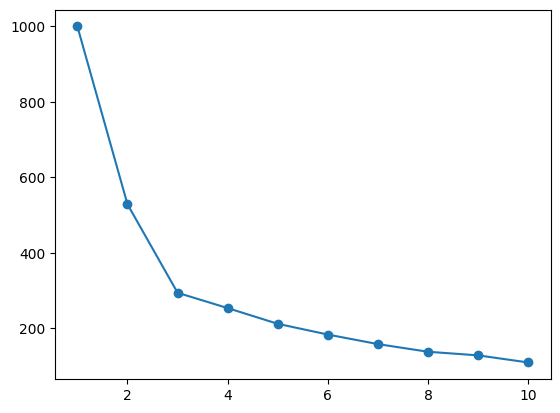

In [271]:
plt.plot(K_range, inertia, marker='o')

In [272]:
kmeans_final = KMeans(n_clusters=4, random_state=42)
kmeans_final

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [273]:
cluster_labels = kmeans_final.fit_predict(X_scaled)

In [274]:
df['cluster'] = cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

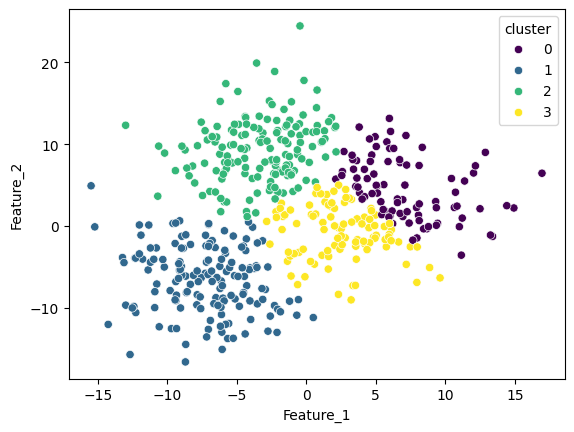

In [275]:
sns.scatterplot(x=df['Feature_1'],
                y=df['Feature_2'],
                hue=df['cluster'],
                palette='viridis')

**DBSCAN**

In [276]:
from sklearn.datasets import make_moons

In [277]:
X, y_true = make_moons(n_samples=500, noise=0.05, random_state=42)

In [278]:
from sklearn.cluster import KMeans, DBSCAN

In [279]:
kmeans_labels = kmeans.fit_predict(X_scaled) #df and standard scale done above
df['kmeans_cluster'] = kmeans_labels
df

,Feature_1,Feature_2,cluster,kmeans_cluster
0,-2.282534,-9.692815,1,7
1,-6.147668,1.755990,2,9
2,13.399091,-1.260023,0,2
3,-4.077630,3.160226,2,1
4,9.444735,0.340868,0,2
...,...,...,...,...
495,-1.282205,-3.181575,3,5
496,-2.817604,10.378894,2,4
497,3.296740,8.649256,0,6
498,-8.970519,-2.684073,1,9


<Axes: xlabel='Feature_1', ylabel='Feature_2'>

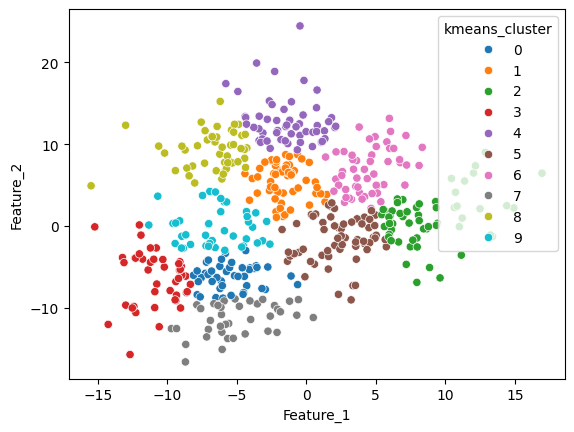

In [280]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['kmeans_cluster'], palette='tab10')

# Why tab10 works well for K-Means
# 1. Designed for categorical data
# 2. Supports up to 10 distinct colors
# 3. Ideal when hue = cluster labels

In [281]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
df['dbscan_cluster'] = dbscan_labels
df

,Feature_1,Feature_2,cluster,kmeans_cluster,dbscan_cluster
0,-2.282534,-9.692815,1,7,0
1,-6.147668,1.755990,2,9,0
2,13.399091,-1.260023,0,2,-1
3,-4.077630,3.160226,2,1,0
4,9.444735,0.340868,0,2,0
...,...,...,...,...,...
495,-1.282205,-3.181575,3,5,0
496,-2.817604,10.378894,2,4,0
497,3.296740,8.649256,0,6,0
498,-8.970519,-2.684073,1,9,0


<Axes: xlabel='Feature_1', ylabel='Feature_2'>

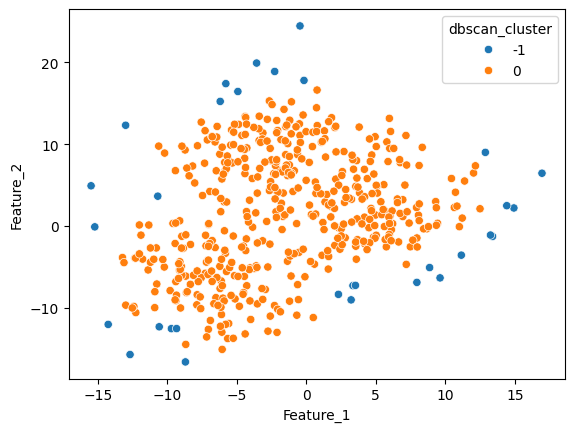

In [282]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['dbscan_cluster'], palette='tab10')

# **Dimensionality** **Reduction**

**PCA**

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [284]:
X, y = make_blobs(n_samples=500, n_features=5, centers=3, cluster_std=1.5, random_state=42)
X

array([[ -9.85712583,   9.52196609,   6.40680626,  -6.81757623,
         -7.86054541],
       [ -8.04717781,   8.40261648,   6.40946097,  -4.33576029,
         -6.70289196],
       [ -3.73690895,   6.7601386 ,   4.24877609,   0.28504117,
         -7.10318219],
       ...,
       [ -5.82805   ,  -7.29173339,   7.48633693,   2.71623974,
          7.33823548],
       [ -2.48648271,   9.67739715,   6.21190845,   1.03031506,
         -7.54637531],
       [ -8.63901448, -10.68852991,   8.36601977,   4.94211449,
          3.77070371]], shape=(500, 5))

In [285]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.07039133,  0.74546814,  0.0859273 , -1.58466105, -0.90798501],
       [-0.52251206,  0.61451192,  0.08731966, -0.95761934, -0.68801347],
       [ 0.78222538,  0.4223533 , -1.04593191,  0.20984645, -0.76407462],
       ...,
       [ 0.14922774, -1.22161917,  0.65212732,  0.82409945,  1.98001159],
       [ 1.16073493,  0.7636525 , -0.01629411,  0.39814317, -0.84828797],
       [-0.70166364, -1.61902103,  1.11350971,  1.38647649,  1.30212699]],
      shape=(500, 5))

In [286]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 1.40522818e+00, -1.73079914e+00],
       [ 1.03463536e+00, -9.82792414e-01],
       [ 1.10182830e+00,  1.09084050e+00],
       [-1.76465839e+00,  1.09970698e-01],
       [ 8.59673831e-01, -1.63970361e+00],
       [ 1.09738958e+00,  1.11937509e+00],
       [ 1.04453451e+00,  1.88953610e+00],
       [-3.14810185e+00, -1.06909853e-01],
       [-1.34287183e+00,  7.48033000e-01],
       [ 4.59419122e-01,  9.66806100e-01],
       [ 1.64897776e+00,  1.95384681e+00],
       [ 7.73369393e-01,  2.09584610e+00],
       [-1.92869648e+00,  9.48608771e-02],
       [ 1.15480661e+00, -1.42564791e+00],
       [ 7.07330515e-01, -1.01056640e+00],
       [ 1.59661674e+00, -1.64931961e+00],
       [-2.40550592e+00, -7.53357753e-01],
       [-1.97627695e+00, -3.59747020e-02],
       [ 1.26193015e+00,  2.72813008e+00],
       [ 1.58339885e+00, -1.46125327e+00],
       [ 1.61435981e+00,  1.29812279e+00],
       [-1.74438705e+00,  1.58820049e-01],
       [-1.88938008e+00,  3.66662930e-01],
       [ 6.

In [287]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['label'] = y
df_pca

,PC1,PC2,label
0,1.405228,-1.730799,2
1,1.034635,-0.982792,2
2,1.101828,1.090840,0
3,-1.764658,0.109971,1
4,0.859674,-1.639704,2
...,...,...,...
495,0.943914,2.141657,0
496,0.521872,1.194774,0
497,-2.465380,0.348773,1
498,0.972369,1.001936,0


<Axes: xlabel='PC1', ylabel='PC2'>

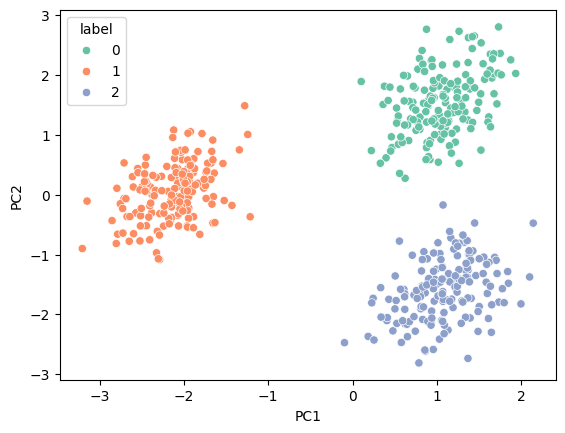

In [288]:
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='label', palette='Set2')